# 1. Exercícios primeira parte

In [1]:
import pandas as pd

In [2]:
url = 'https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/base-de-dados/aluguel.csv'
df = pd.read_csv(url, sep=';')

In [3]:
df.head()

,Tipo,Bairro,Quartos,Vagas,Suites,Area,Valor,Condominio,IPTU
0,Quitinete,Copacabana,1,0,0,40,1700.0,500.0,60.0
1,Casa,Jardim Botânico,2,0,1,100,7000.0,NaN,NaN
2,Conjunto Comercial/Sala,Barra da Tijuca,0,4,0,150,5200.0,4020.0,1111.0
3,Apartamento,Centro,1,0,0,15,800.0,390.0,20.0
4,Apartamento,Higienópolis,1,0,0,48,800.0,230.0,NaN


In [5]:
df.groupby('Tipo')['Quartos'].mean(numeric_only=True).to_frame()

,Quartos
Tipo,
Apartamento,2.481569
Box/Garagem,0.060976
Casa,3.133402
Casa Comercial,1.562264
Casa de Condomínio,4.007028
Casa de Vila,1.927711
Chácara,3.000000
Conjunto Comercial/Sala,0.040939
Flat,1.415966


In [7]:
df['Bairro'].unique

<bound method Series.unique of 0                  Copacabana
1             Jardim Botânico
2             Barra da Tijuca
3                      Centro
4                Higienópolis
                 ...         
32955                  Centro
32956             Jacarepaguá
32957    São Francisco Xavier
32958                  Leblon
32959                  Centro
Name: Bairro, Length: 32960, dtype: object>

In [23]:
df.groupby('Bairro')['Valor'].mean(numeric_only=True).sort_values(ascending=False).head()


Bairro
Jacarepaguá      314143.489637
Irajá            154610.470588
Caju             120264.782609
Vasco da Gama    120000.000000
Cidade Nova       88166.692308
Name: Valor, dtype: float64

<Axes: title={'center': 'Top 5 bairros mais caros de se viver!'}, xlabel='Bairro', ylabel='Aluguel'>

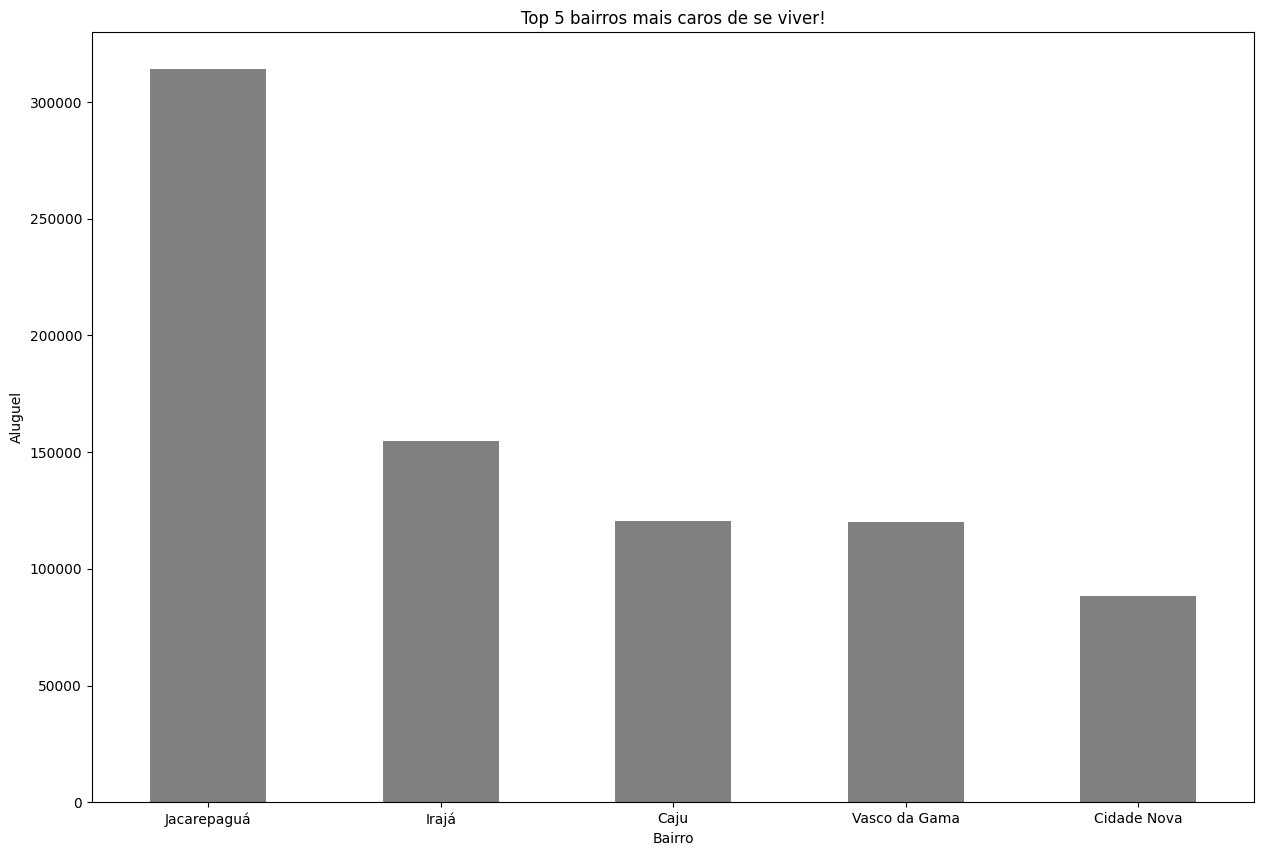

In [21]:
df_bairros_caros = df.groupby('Bairro')['Valor'].mean(numeric_only=True).sort_values(ascending=False).head()
df_bairros_caros.plot(kind='bar', figsize=(15,10), color='gray', 
                      xlabel='Bairro', ylabel='Aluguel', 
                      title='Top 5 bairros mais caros de se viver!',
                      rot=0)

# 2. Exercicios segunda parte

In [1]:
import pandas as pd

In [2]:
url = 'https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/desafios/alunos.csv'
df = pd.read_csv(url, sep=',')
df.head()

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
1,Ana,18,NaN,False
2,Cátia,27,2.5,False
3,Denis,18,5.0,False
4,Beto,21,10.0,True


In [3]:
df.isnull().sum()

Nome        0
Idade       0
Notas       6
Aprovado    0
dtype: int64

In [4]:
df = df.fillna(0)

In [18]:
df_filtrado = (df['Nome'] != 'Alice') & (df['Nome'] != 'Carlos') & (df['Aprovado'] == True)
df_aprovados = df[df_filtrado]

In [19]:
df_aprovados.replace(7.0, 8.0, inplace=True)
df_aprovados

C:\Users\Usuario\AppData\Local\Temp\ipykernel_12128\2272314796.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_aprovados.replace(7.0, 8.0, inplace=True)


,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
4,Beto,21,10.0,True
6,Dara,21,8.0,True
12,Sthefanie,26,9.5,True
13,Mirla,25,9.0,True
15,Mylena,29,8.0,True
17,Nadia,34,8.0,True


In [21]:
df_aprovados.to_csv(r'C:\Users\Usuario\Documents\Estudos\FIAP\Estudos\ALURA\03_Curso_Pandas_Inicial\src\alunos_aprovados.csv')

# 3. Exercicios terceira parte

In [8]:
import pandas as pd
import numpy as np

In [2]:
url = 'https://raw.githubusercontent.com/alura-cursos/pandas-conhecendo-a-biblioteca/main/desafios/alunos.csv'
df = pd.read_csv(url, sep=',')
df.head()

,Nome,Idade,Notas,Aprovado
0,Ary,20,7.5,True
1,Ana,18,NaN,False
2,Cátia,27,2.5,False
3,Denis,18,5.0,False
4,Beto,21,10.0,True


In [3]:
df.fillna(0, inplace=True)

In [5]:
df['Pontos_extras'] = df['Notas'].apply(lambda x: x *0.4)

In [6]:
df.head()

,Nome,Idade,Notas,Aprovado,Pontos_extras
0,Ary,20,7.5,True,3.0
1,Ana,18,0.0,False,0.0
2,Cátia,27,2.5,False,1.0
3,Denis,18,5.0,False,2.0
4,Beto,21,10.0,True,4.0


In [11]:
df['Notas_finais'] = np.minimum(df['Notas'] + df['Pontos_extras'], 10)
df.head()

,Nome,Idade,Notas,Aprovado,Pontos_extras,Notas_finais
0,Ary,20,7.5,True,3.0,10.0
1,Ana,18,0.0,False,0.0,0.0
2,Cátia,27,2.5,False,1.0,3.5
3,Denis,18,5.0,False,2.0,7.0
4,Beto,21,10.0,True,4.0,10.0


In [12]:
df['Aprovado_final'] = df['Notas_finais'] > 6

In [14]:
df.head()

,Nome,Idade,Notas,Aprovado,Pontos_extras,Notas_finais,Aprovado_final
0,Ary,20,7.5,True,3.0,10.0,True
1,Ana,18,0.0,False,0.0,0.0,False
2,Cátia,27,2.5,False,1.0,3.5,False
3,Denis,18,5.0,False,2.0,7.0,True
4,Beto,21,10.0,True,4.0,10.0,True


In [15]:
df_aprovados_novos = (df['Aprovado'] == False) & (df['Aprovado_final'] == True)
df[df_aprovados_novos] 

,Nome,Idade,Notas,Aprovado,Pontos_extras,Notas_finais,Aprovado_final
3,Denis,18,5.0,False,2.00,7.00,True
8,Alice,35,5.6,False,2.24,7.84,True
11,Igor,24,4.5,False,1.80,6.30,True
